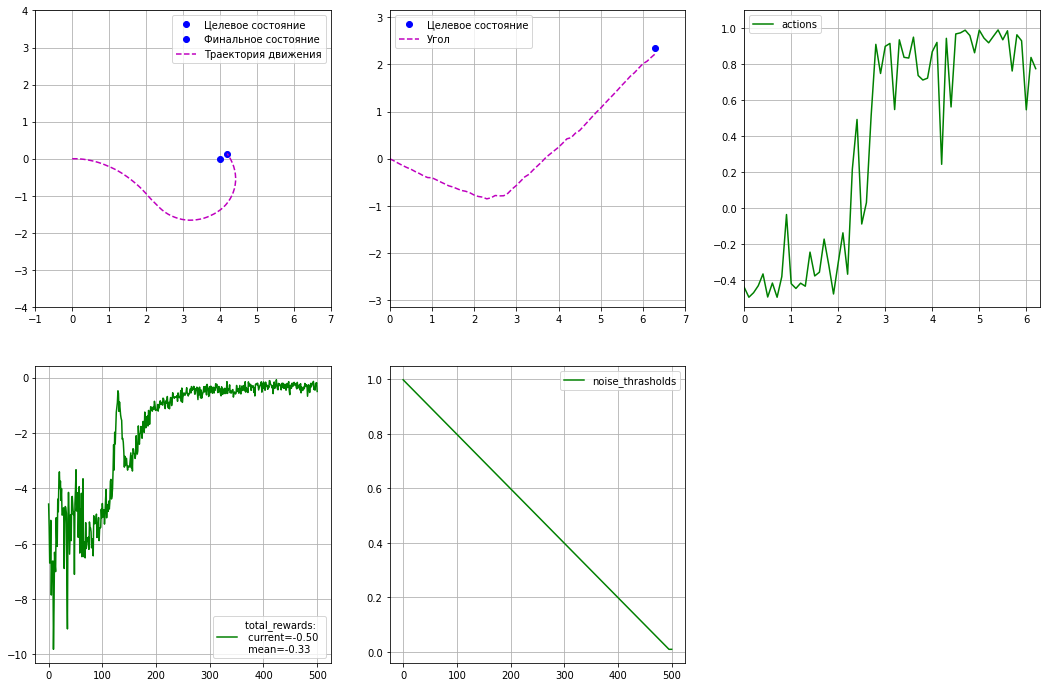

time: 421.9273087978363


In [12]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import torch.nn as nn
import time
import torch
from Environments.DubinsCar.DubinsCar import DubinsCar
from Environments.DubinsCar.DubinsCarVisualizer import DubinsCarVisualizer
from Agents.SAC import SAC
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.Noises import OUNoise
from Solvers import OneAgentSolver as solver 
%load_ext autoreload
%autoreload 2

#learning parameters
episode_n = 501

#environment initialization
env = DubinsCar(dt=0.1, inner_step_n=1)

#agent initialization
q1_model = SequentialNetwork([env.state_dim + env.action_dim, 256, 128, 1])
q2_model = SequentialNetwork([env.state_dim + env.action_dim, 256, 128, 1])
pi_model = SequentialNetwork([env.state_dim, 256, 128, 2 * env.action_dim], output_n=2)
noise = OUNoise(action_dim=env.action_dim, threshold_decrease=1/episode_n)
agent = SAC(env.action_min, env.action_max, q1_model, q2_model, pi_model, noise,
             q_model_lr=1e-3, pi_model_lr=1e-3, gamma=1, batch_size=128, tau=1e-2, entropy_coef=1e-2)

#learning
visualizer = DubinsCarVisualizer(waiting_for_show=50)
start_time = time.time()
solver.go(env, agent, episode_n=episode_n, show=visualizer.show)
print('time:', time.time() - start_time)

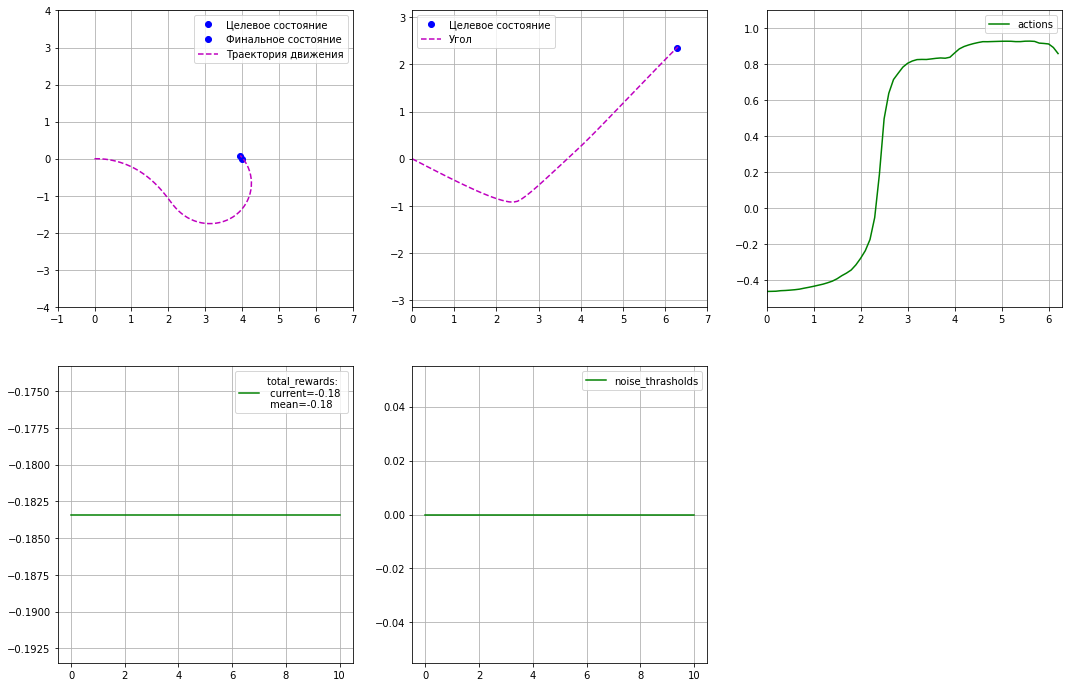

time: 1.167999267578125


In [13]:
#test
agent.noise.threshold = 0
visualizer = DubinsCarVisualizer(waiting_for_show=10)
start_time = time.time()
solver.go(env, agent, episode_n=11, show=visualizer.show, agent_learning=False)
print('time:', time.time() - start_time)